
# Question 3. *How to Identify Clusters of U.S. Regions with Similar Health Outcomes and Contributing Factors for Heart Disease and Diabetes?*

## Machine Learning Foundations with Python Project
### Name:  Nicolle Vigil

### Homework Outline and Timeline

1: Data Pre-Processing

2: Principal Component Analysis 

3: KMeans Clustering and Kmeans ++

4: Agglomerate Clustering Clustering 

5: Evaluation of Results 

6: Interpretations [20 pts] *(1-2 days)*



### Purpose
In this section we will use different clustering methods in order to identify regions that are similar to one another. 

To answer the question we will focus on the different US regions such as.


**REGIONS AND THEIR DETERMINED STATES**

| Region | States |
| ---       | ----------- |
| **South** |Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana,Maryland, Mississippi, North Carolina, klahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia 
| **West** |Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, New Mexico, Nevada, Oregon, Utah, Washington, and Wyoming
| **Northeast** |Maine, New York, New Jersey, Vermont, Massachusetts, Rhode Island, Connecticut, New Hampshire, and Pennsylvania
| **Midwest** | Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, and Wisconsin


---

Import the necessary libraries in the code below.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc 
from sklearn.decomposition import PCA  


# Visualization
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score

from sklearn.mixture import GaussianMixture

%matplotlib inline
sns.set_style("whitegrid")


Use the same seed throughout the entire notebook.

In [3]:
seed = 82

---

### Question 1. *Data Pre-Processing* [15 pts]

**1)a) Loading the already cleaned dataset `SDOH_2017_Final_Cleaned.csv` and printing the first 5 rows.**


In [4]:
data = pd.read_csv('sdoh_FINAL.csv')
data.head()

,YEAR,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
0,2017,South,0,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11
1,2017,South,0,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,...,0.0,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00
2,2017,South,0,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67
3,2017,South,0,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,...,0.0,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27
4,2017,South,0,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00


**1)b) Remove Unnecerary columns such as**
* TERRITORY
* YEAR

In [5]:
data = data.drop(['YEAR', 'TERRITORY'], axis = 1)
data.head()

,REGION,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
0,South,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,41034.0,5125.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11
1,South,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,158135.0,18807.0,...,0.0,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00
2,South,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,20687.0,1649.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67
3,South,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,17850.0,1317.0,...,0.0,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27
4,South,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,44075.0,4198.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00


**1)c) Performing one-hot encoding on the categorical column `REGION` in original dataframe data. We also need to create Create a new DataFrame named and`data_encoded`. I am using One-hot encoding since `REGION` contains nominal data, and there is no order or ranking.**

In [6]:
data_encoded = pd.get_dummies(data, columns=['REGION'])
encoded_cols = ['REGION_Midwest','REGION_Northeast','REGION_South','REGION_West']
data_encoded[encoded_cols] = data_encoded[encoded_cols].astype(int)
data_encoded.head()

,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West
0,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,41034.0,5125.0,11905.0,...,0.00,1.0,0.02,50.00,38.89,11.11,0,0,1,0
1,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,158135.0,18807.0,39381.0,...,0.00,3.0,0.01,63.49,36.51,0.00,0,0,1,0
2,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,20687.0,1649.0,4492.0,...,0.00,1.0,0.04,73.33,20.00,6.67,0,0,1,0
3,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,17850.0,1317.0,3730.0,...,0.04,1.0,0.04,27.27,45.45,27.27,0,0,1,0
4,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,44075.0,4198.0,11836.0,...,0.00,1.0,0.02,60.00,40.00,0.00,0,0,1,0


In this case One hot encoding will creates a matrix of 0 and 1 to give an individual identificator for each REGION. In addition it will also increase dimentionality by placing each unique region on a column with their assigned identificator matrix. 

**1)d) **Scaling the data with different methods such as**

 * `StandardScaler`
 * `MinMaxScaler`
 * `RobustScaler`
 * `Normalizer`

**Then deciding which method is the best based on the distribution plots from the scaled data**

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(data_encoded)

robust_scaler = RobustScaler()
robust_scaler_data = robust_scaler.fit_transform(data_encoded)

Norm = Normalizer()
Norm_data = Norm.fit_transform(data_encoded)

In [8]:
pd.set_option('mode.use_inf_as_na', True)

figs, axs = plt.subplots(2, 2, figsize=(15,10))
sns.kdeplot(data=scaled_data,ax=axs[0, 0])
axs[0, 0].set_title('Standard Scaler')
axs[0, 0].get_legend().set_visible(False)

sns.kdeplot(data=minmax_data, ax=axs[0, 1])
axs[0, 1].set_title('Min Max Scaler')
axs[0, 1].get_legend().set_visible(False)

sns.kdeplot(data=robust_scaler_data, ax=axs[1, 0])
axs[1, 0].set_title('Robust Scaler')
axs[1, 0].get_legend().set_visible(False)

sns.kdeplot(data=Norm_data,ax=axs[1, 1])
axs[1, 1].set_title('Normalizer')
axs[1, 1].get_legend().set_visible(False)

figs.tight_layout()
plt.show()


C:\Users\NicolleV\AppData\Local\Temp\ipykernel_19216\2580601827.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
c:\Users\NicolleV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NicolleV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NicolleV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

CHOSEN SCALING METHOD: 'STANDARD SCALER'

This method is the best since it will help decrease the ammount of ouliers which will improve cluster algorithms perform better. 

Chosen: Standard scaler

In [ ]:
#Data frame for scaled features

X = pd.DataFrame(scaled_data, columns=data_encoded.columns)
X.head()

,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West
0,-0.140648,-0.139616,-0.140193,-0.142842,-0.144437,-0.152356,-0.142561,-0.145650,-0.048804,-0.127793,...,-0.355516,-0.311511,-0.454513,-0.351973,0.562310,0.023364,-0.697102,-0.268546,1.06869,-0.401581
1,0.316912,0.318792,0.321251,0.323879,0.324076,0.275421,0.345219,0.325180,0.914164,0.294818,...,-0.355516,0.085148,-0.512627,0.233015,0.425737,-0.684193,-0.697102,-0.268546,1.06869,-0.401581
2,-0.229600,-0.228202,-0.229653,-0.228669,-0.228738,-0.250713,-0.226667,-0.227459,-0.293453,-0.241813,...,-0.355516,-0.311511,-0.338286,0.659722,-0.521663,-0.259404,-0.697102,-0.268546,1.06869,-0.401581
3,-0.240770,-0.239760,-0.241074,-0.239679,-0.239699,-0.246837,-0.238487,-0.238866,-0.316820,-0.253534,...,0.584754,-0.311511,-0.338286,-1.337650,0.938745,1.052538,-0.697102,-0.268546,1.06869,-0.401581
4,-0.132531,-0.130888,-0.132699,-0.133710,-0.132995,-0.124288,-0.130085,-0.133423,-0.114049,-0.128855,...,-0.355516,-0.311511,-0.454513,0.081672,0.626005,-0.684193,-0.697102,-0.268546,1.06869,-0.401581


**1)e) Using the data from `X`, we can create 1x2 subplots. Each scatter plot will contain Average rehospitalization rate in the country in the y axis, and Total cardiovascular disease deaths per 100,000 population, and Percentage of adults with diagnosed diabetes (ages 20 and over) in the x axis.**


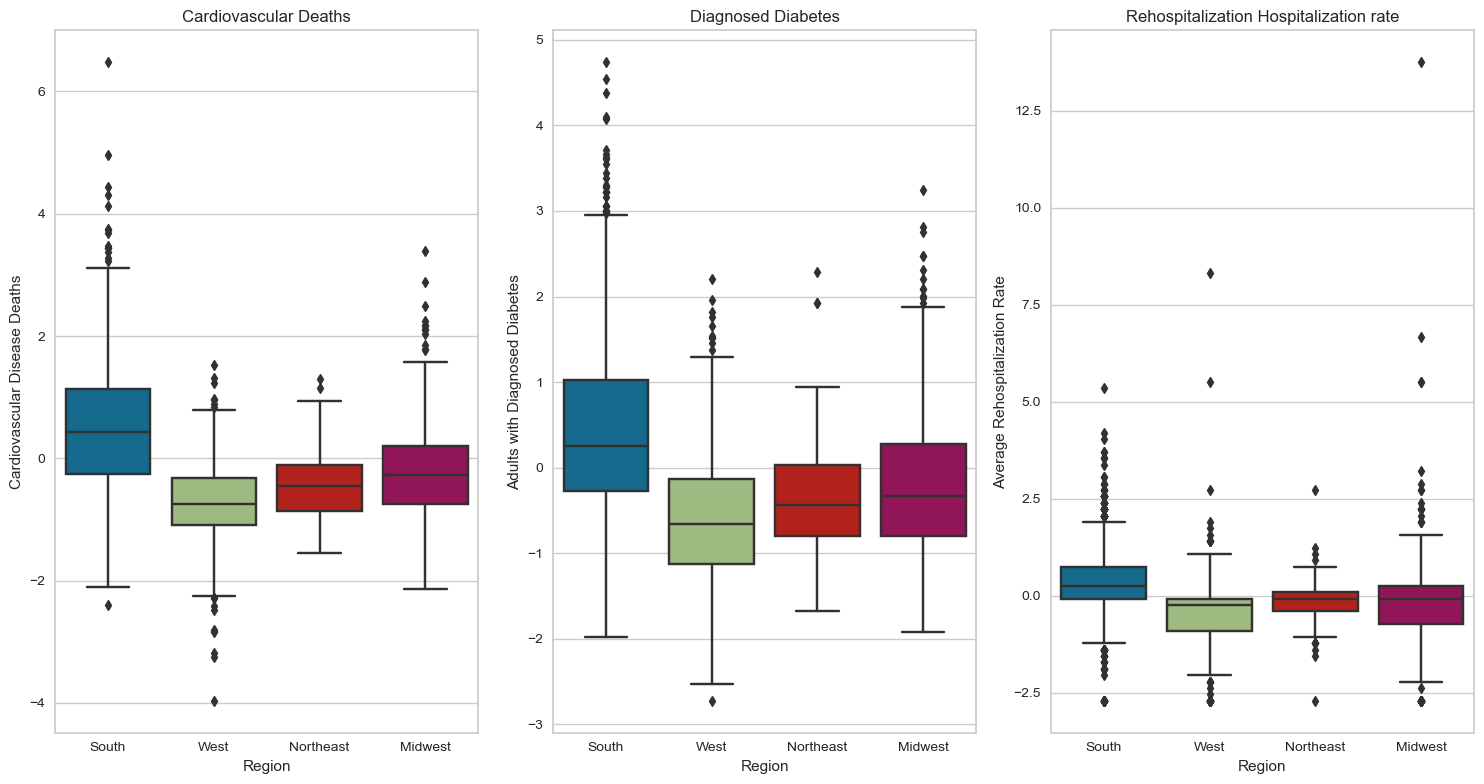

In [ ]:
figs, axs = plt.subplots(1, 3, figsize=(15, 8))

# Create box plot for CDCA_HEART_DTH_RATE_ABOVE35
sns.boxplot(data=X, x=data['REGION'], y='CDCA_HEART_DTH_RATE_ABOVE35', ax=axs[0])
axs[0].set_title('Cardiovascular Deaths')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Cardiovascular Disease Deaths')

# Create box plot for CHR_PCT_DIABETES
sns.boxplot(data=X, x=data['REGION'], y='CHR_PCT_DIABETES', ax=axs[1])
axs[1].set_title('Diagnosed Diabetes')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Adults with Diagnosed Diabetes')

sns.boxplot(data=X, x=data['REGION'], y='LTC_AVG_OBS_REHOSP_RATE', ax=axs[2])
axs[2].set_title('Rehospitalization Hospitalization rate')
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Average Rehospitalization Rate')

figs.tight_layout()
plt.show()

 > **Cardiobascular Deaths**

Variable: CDC_Heart_Dth_Rate_Above35

 The plot contains box plot that allows the comparison of heart disease death rate in people above 35 across South, West, Northeast, and Midwest regions. It can be seen that the South region has the highest median value, which means that it could have the highest rate of heart disease deaths among all the regions. On the other hand, the West reegion has the lowest rate of heart disease deaths among the other regions. In addition, the Northeast and Midwest have similar medians which are lower than the South but higher than the West. Finally, the South and West regions show the greatest variability in data and the Northeast has the least variability.

> **Percent of adults diagnosed with diabetes aboe age 20**

Variable: CHR_PCT_DIABETES

The plot contains box plot that allows the comparison of adults diagnosed with diabetes in people above 20 across South, West, Northeast, and Midwest regions. In this case, the South boxplot has the highest median value, which indicates higher rates of diabetes cases. The south also has the higher amount of outliers in the data. In contrast, the West region has the lowest median values which indicates that the rate of diabetes cases is lower in this region. In additin the South has the largest spread of data which is similar to the first plot. This means there is a wider range of diabetes percentages within the region.

> **Rehospitalization Hospitalization rate**

Variable: LTC_AVG_OBS_REHOSP_RATE

Like the other two variables The rehospitalization rate in the US follows the same trend through different regions. Just like the South had higher deaths related to heart disease, and a high percentage of adults diagnose with diabetes, it also has the higher rehospitalization rates. On the other hand the West region has the lowest hospitalization rates. It can be also seen that there is a high variability among all the Regions, this could mean there could be other different factors that affect the distribution of this variable.  

---

### 2. *Principal Component Analysis*

**2)a) PCA is used for dimensioanlity reduction, this method can be use to improve clustering methds by reducing data dimensionality and preserving the maximum amount of variance. In our case the dataset consists of 855 columns and 3232 rows. This will be too much data for the clustering algorithms, therefore, pca will help remove unnecesary features

In [ ]:
X.shape

(3226, 843)

In [ ]:
pca = PCA(random_state=seed)
pca.fit(X)
    

PCA(random_state=82)

> your answer here

**2)b) Creating a DataFrame that contains the loading vectors for each principal component. 

Columns = Features 

Rows = Vectors

In [ ]:
loading_vectors_df = pd.DataFrame(pca.components_, columns=X.columns)

loading_vectors_df

,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West
0,0.073034,7.300397e-02,7.306094e-02,7.310900e-02,7.311285e-02,7.251302e-02,7.309710e-02,7.311622e-02,6.959419e-02,7.249639e-02,...,-4.929192e-03,6.724786e-02,-1.476026e-02,6.022099e-03,7.596221e-03,-1.316549e-02,-0.006677,0.014428,-0.004989,0.005804
1,0.009215,9.033112e-03,9.107808e-03,8.996263e-03,8.989207e-03,9.258070e-03,8.853833e-03,8.967638e-03,5.746133e-03,8.963790e-03,...,-2.426134e-02,9.794655e-03,-1.683123e-02,1.339042e-02,-3.471833e-03,-1.445575e-02,-0.050003,-0.021775,0.074241,-0.023500
2,0.032648,3.261838e-02,3.259445e-02,3.279781e-02,3.282958e-02,3.127545e-02,3.294224e-02,3.303508e-02,1.082332e-02,3.014269e-02,...,2.564377e-02,4.291520e-02,5.505678e-02,-2.704789e-02,-4.193399e-03,3.216093e-02,0.032837,-0.002444,-0.051177,0.031056
3,-0.014360,-1.483364e-02,-1.410738e-02,-1.337662e-02,-1.330176e-02,-1.503660e-02,-1.319662e-02,-1.307346e-02,-1.016931e-02,-1.790897e-02,...,-2.717068e-03,-8.622048e-03,-4.521178e-02,5.546124e-02,-2.502632e-02,-4.411814e-02,0.005856,0.047531,-0.010813,-0.026772
4,-0.016023,-1.650835e-02,-1.608277e-02,-1.595635e-02,-1.592491e-02,-1.483998e-02,-1.644934e-02,-1.597135e-02,-1.817753e-02,-1.627392e-02,...,3.100792e-03,-1.691062e-02,-4.454919e-04,-1.407745e-02,1.088208e-04,-1.326106e-03,-0.032528,0.007702,-0.032059,0.084800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.000000,1.283174e-14,9.858477e-14,-2.624385e-13,1.861105e-13,3.019854e-16,3.875974e-15,-1.934864e-14,1.507260e-14,1.004801e-14,...,1.393200e-17,-1.301043e-18,2.428613e-17,-6.852158e-17,-3.989864e-17,5.637851e-18,-0.499970,-0.266949,-0.531698,-0.368547
839,-0.000000,-1.473848e-14,-6.531653e-14,8.809077e-14,-1.137526e-13,3.260960e-15,1.222571e-14,6.491879e-14,-1.715839e-14,6.966325e-15,...,6.789816e-18,-2.786400e-16,5.898060e-17,-4.336809e-17,-8.239937e-17,-6.114900e-17,-0.009954,-0.005315,-0.010586,-0.007338
840,0.000000,-3.474440e-14,-2.500932e-14,7.513785e-14,-9.594050e-14,4.803911e-16,8.664974e-15,2.111243e-14,1.269130e-14,-1.407407e-14,...,-2.168404e-18,-5.767956e-17,-2.775558e-17,-7.459311e-17,-4.336809e-17,-4.922278e-17,0.163753,0.087433,0.174145,0.120709
841,0.000000,4.589350e-15,2.921905e-14,-1.093918e-13,7.957360e-14,-9.770799e-16,-3.122698e-15,6.022446e-15,-3.566224e-15,1.812215e-14,...,3.899062e-17,-2.010111e-16,4.597017e-17,7.806256e-17,5.204170e-17,1.608956e-16,0.006767,0.003613,0.007197,0.004989


This dataframe represents the principal components vectors of each feature. Ech row is a principal component that explains the variance of the data. For example for the first feaure 'ACS_TOT_POP_WT' the first principal that represent majority of variance in this feature is 0.073. Row 2, contains the next components that helps explain more variance that component 1 in row 1 did not captured.

**2)c) Determining the Rigth ammount of PCA components to represents the vast majority of the data by plotting a screeplot**

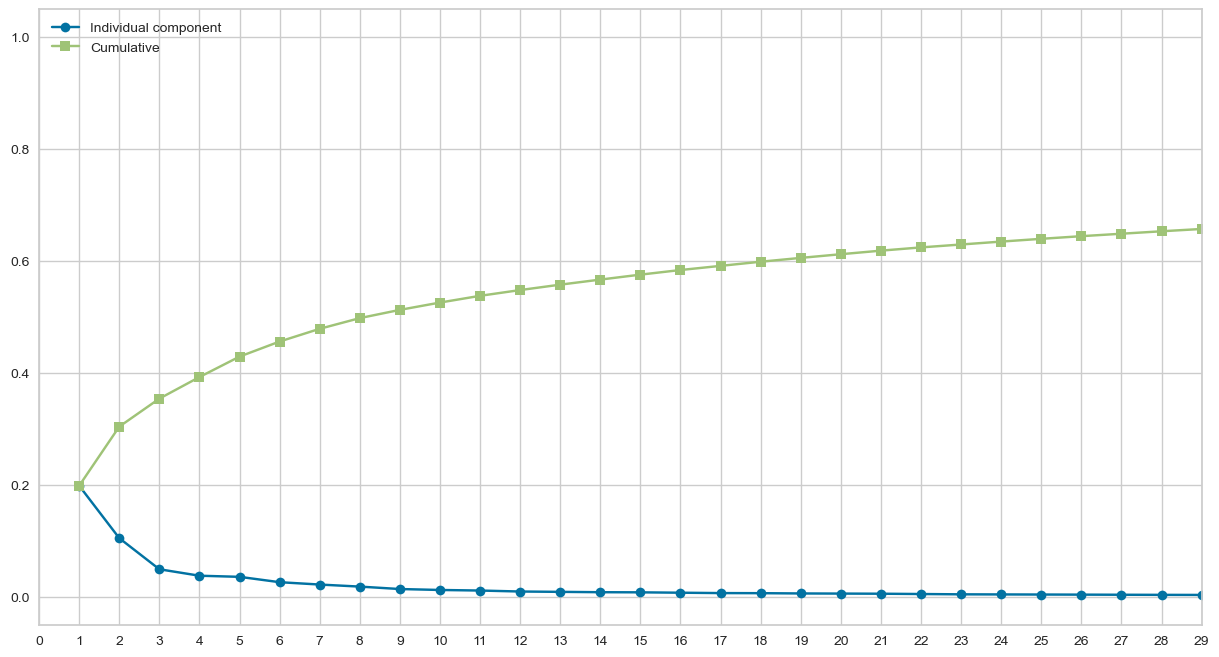

In [ ]:
pcidx = np.arange(1, pca.n_components_+1)

plt.figure(figsize=(15, 8))

plt.plot(pcidx, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.xlim(0, 10)  
plt.xticks(np.arange(0, 30, step=1))  
plt.legend(loc=2)
plt.grid(True)  

plt.show()

As we can see in the graph based on the variance we can see that at least 60% of the dataset will be explained with 19 components. We reduced dimensioanlity of the data by reducing 843 features to only 19. 

**2)d) Redoing  **PCA with 19 components**

In [ ]:
n_components = 19
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
           'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
            'PC18', 'PC19' ]
pca = PCA(n_components=n_components, random_state=seed)
X_PCA = pd.DataFrame(pca.fit_transform(X), columns=columns, index=X.index)
X_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.208853,3.306504,-10.206121,-1.919646,-4.175861,-2.113208,3.437139,-1.935634,-0.110883,-0.618029,-3.254303,1.943811,-1.296711,-1.178015,1.466876,-0.769006,1.267831,-0.836270,-1.524265
1,5.653432,2.139201,-8.785330,-1.325746,-6.016011,-1.405555,1.939834,4.291682,-3.678047,2.758391,-3.597911,0.477802,-1.213186,0.865907,-1.471515,0.449983,-1.527095,0.237388,0.283741
2,-5.105893,19.147785,-1.030881,1.850253,-0.216145,1.198650,4.755366,-0.521229,1.719262,-7.284796,-1.421032,-0.997722,3.039717,2.114604,0.330920,4.194942,0.246570,-0.932024,-2.099100
3,-4.838071,8.729102,-1.362874,-1.022690,-4.590716,0.321147,3.237440,-2.004603,2.533578,-1.508261,0.925980,-0.231081,1.126763,2.115423,2.963817,0.435118,2.347548,-3.485515,-0.038178
4,-3.485745,4.258741,-3.081566,-2.441824,-5.850205,-4.284347,1.324031,-0.334505,-1.389668,1.351434,2.102441,-1.554630,-0.653378,-0.179252,1.422653,-0.125424,2.099320,0.412065,0.027023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,-5.384124,16.671711,4.755950,12.263707,11.074647,-12.151415,-14.700184,5.698883,5.234404,3.508837,-6.432838,2.673499,-0.679835,-1.019677,0.763116,1.671321,2.034784,1.206613,-3.299325
3222,-5.295003,14.644205,6.313918,11.714134,11.203029,-9.974809,-15.434814,8.301456,3.556492,5.638878,-4.392078,3.890541,0.254444,-0.879590,1.911798,1.178292,2.312452,-3.118394,-0.779845
3223,-2.959428,-0.519241,-1.565470,-0.090310,-1.793659,-2.216282,0.214043,-0.145510,0.699631,-1.365044,-0.924372,-1.391487,0.985672,-1.038462,1.292488,0.348677,-0.485346,0.508956,-0.328866
3224,-3.881200,-1.175025,-1.248927,0.009052,-1.509417,-2.419247,-0.109353,0.078888,0.338044,-1.178582,-1.260803,-1.470961,1.079658,-1.220969,1.691787,0.536214,-0.542247,0.745314,0.244801


These are the 19 components that explain the most variace in the data. The as we can see for each component's for each row. The first component explains the mmost variance in the dataset. Followed by the second component and so forth. 

---

### Clustering Algoritms 

**In this section we will be interpreting the results from 3 clustering algorithms:**

* K-means ++
* Agglomerative Clustering
* HDBSCAN
---

### 3. Kmeans++ 

**3)a) We will fit clustering algorithm with `X_PCA` dataframe.**
    
In this section a function will contain our kmeans++ clustering model and we will try to fit the data with 2 different metrics, the dafault 'Eucledian Distance' and 'calinski_harabasz'. Then we will determined the optimal K using the elbowgraph to plot k=[3,20].

In [ ]:
def kmeans_plus_plus(X, num_clusters, seed):
    
      
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=seed, n_init=10, algorithm='elkan')
    
    return kmeans


**Elbow plot**

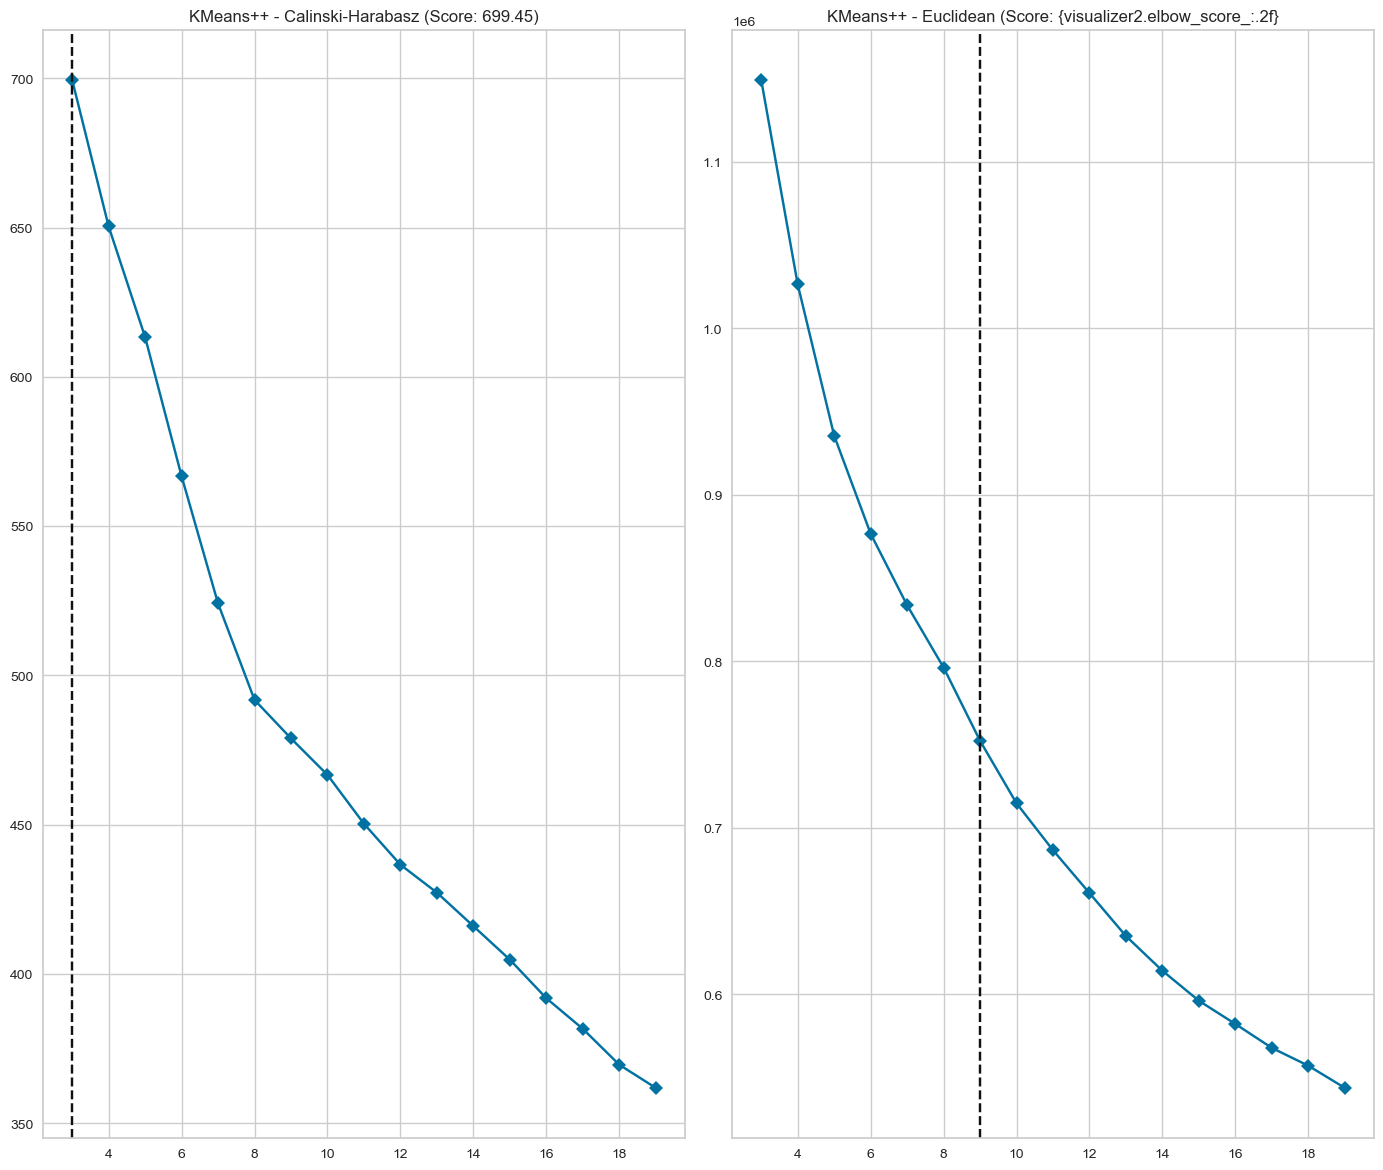

In [ ]:
kmeans = kmeans_plus_plus(X_PCA, num_clusters=(3, 20), seed=seed)

fig, axes = plt.subplots(1, 2, figsize=(14, 12))

# Visualizer 1: kmeans with Calinski-Harabasz metric
visualizer1 = KElbowVisualizer(kmeans, k=(3, 20), metric='calinski_harabasz', timings=False, locate_elbow=True, ax=axes[0])
visualizer1.fit(X_PCA)
axes[0].set_title(f'KMeans++ - Calinski-Harabasz (Score: {visualizer1.elbow_score_:.2f})')

# Visualizer 2: kmeans without Euclidean 
visualizer2 = KElbowVisualizer(kmeans, k=(3, 20), timings=False, locate_elbow=True, ax=axes[1])
visualizer2.fit(X_PCA)
axes[1].set_title('KMeans++ - Euclidean (Score: {visualizer2.elbow_score_:.2f}')


plt.tight_layout()
plt.show()



Based on the elbow plots, that KMeans++ algorithm, with the Calinski Harabasz metric output an optimal k = 3. On the other hand, the model with no metric  output an optimal k = 9.

**3)b) Fit the clustering models with the optimal K and find wich k-means number of optimal clusters provides the best outcomes.**

**K=3**

In [ ]:
kmeans = kmeans_plus_plus(X_PCA, num_clusters=3, seed=seed)

# Fit the KMeans models k = 3
kmeans.fit(X_PCA.values)


labels_kmeans_3 = kmeans.labels_

silhouette_score_kmeans_3 = silhouette_score(X_PCA, labels_kmeans_3)




**SilhouetteVisualizer for k=3**

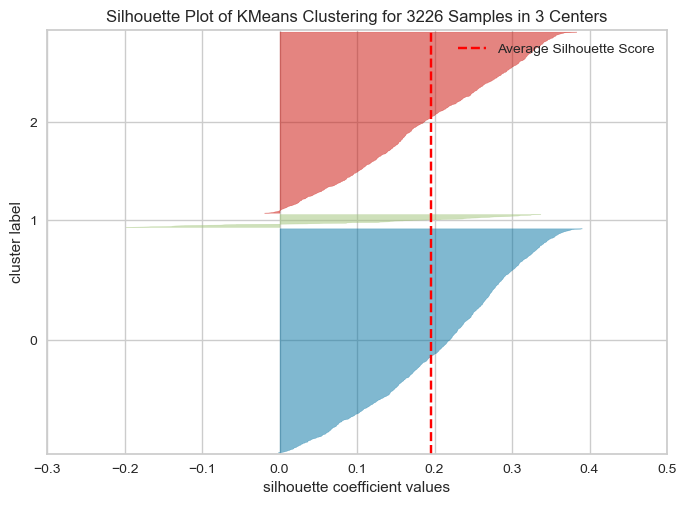

silhouette_score for k=3 0.19557179769371658


In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_PCA.values)
visualizer.show()
print("silhouette_score for k=3", silhouette_score_kmeans_3)


K means++ with 3 clusters had a very low silhouette score of 0.195. This means that there are instances where the data points can be assigned to the wrong cluster. This can be seen mostly on the green clusters since the traces extend towards the negative space.

**k=9**

In [ ]:
kmeans = kmeans_plus_plus(X_PCA, num_clusters=9, seed=seed)

# Fit the KMeans models k = 9
kmeans.fit(X_PCA.values)


labels_kmeans_9 = kmeans.labels_

#
silhouette_score_kmeans_9 = silhouette_score(X_PCA, labels_kmeans_9)

print("silhouette_score_k7",silhouette_score_kmeans_9)


silhouette_score_k7 0.14603619317626063


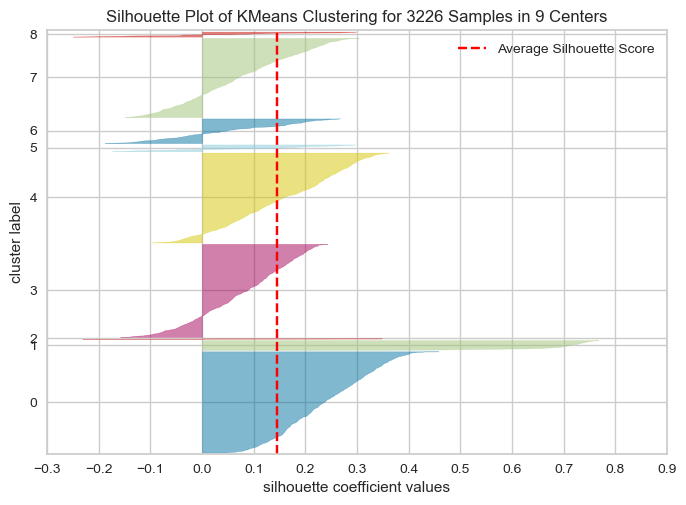

silhouette_score for k = 9 0.14603619317626063


In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_PCA.values)
visualizer.show()
print("silhouette_score for k = 9", silhouette_score_kmeans_9)


The algorithm decreased its performance with 7 clusters. We can see that there is more data wrongly assigned to different clusters. This reduces the sisilhouette score to 0.146

---

### 4. *AgglomerativeClustering Clustering*

**4)a) We will use AgglomerativeClustering clustering with `X_PCA` to Plot dendograms with different likages.**

In [ ]:
agg_clustering = AgglomerativeClustering()

agg_clustering.fit(X_PCA)

# Getting cluster labels
agg_clustering_labels = agg_clustering.labels_

# Performance
agg_clustering_score = silhouette_score(X_PCA, agg_clustering_labels)
print('Silhouette score:', round(agg_clustering_score, 3))


Silhouette score: 0.634


**4)b) In this step we will use fine tunning to determine optimal k**

 We will use different linkages to compute the distance between different clusters, and compare the results using dendograms. This will allow us to find the right method that will aid us to find the optimal K-number of clusters

In [ ]:
hc_ward = shc.linkage(X_PCA, method='ward')
hc_single = shc.linkage(X_PCA, method='single')
hc_complete = shc.linkage(X_PCA, method='complete')
hc_avg = shc.linkage(X_PCA, method='average')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

# Ward's method dendrogram
plt.subplot(2, 2, 1)
plt.title("Ward's Method")
plt.xlabel("Index")
plt.ylabel("Distance")
d = shc.dendrogram(hc_ward, leaf_font_size=10)
plt.axhline(y=600, color='r', linestyle='--')
plt.grid(False)

# Single linkage method dendrogram
plt.subplot(2, 2, 2)
plt.title("Single Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
d = shc.dendrogram(hc_single, leaf_font_size=10)
plt.grid(False)

# Complete linkage method dendrogram
plt.subplot(2, 2, 3)
plt.title("Complete Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
d = shc.dendrogram(hc_complete, leaf_font_size=10)
plt.grid(False)

# Average linkage dendrogram
plt.subplot(2, 2, 4)
plt.title("Average Linkage")
plt.xlabel("Index")
plt.ylabel("Distance")
d = shc.dendrogram(hc_avg, leaf_font_size=10, truncate_mode="lastp", p=7, show_contracted=True)
plt.grid(False)

plt.tight_layout()
plt.show()

It is difficult to determine the optimal k value for the agglomerate clustering from the different dendograms. Among sll the plots Average linkage had the best visual redability compared to other dendograms. In this plot the last two clusters were the most separated clusters. Therefore, by this inforamtion we can say that the optimal number of clusters for agglomerate clustering is k=2 

**4)c) Fit the clustering models with the optimal K**

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
agg_clustering.fit(X_PCA.values) 

#Labels 
agg_clustering_labels_1 = agg_clustering.labels_

# Score 
agg_clustering_score = silhouette_score(X_PCA, agg_clustering_labels_1)
print('Silhouette score:', round(agg_clustering_score, 3))



Silhouette score: 0.92


In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_clustering.fit(X_PCA.values) 

#Labels 
agg_clustering_labels = agg_clustering.labels_

# Score 
agg_clustering_score = silhouette_score(X_PCA, agg_clustering_labels)
print('Silhouette score:', round(agg_clustering_score, 3))



Silhouette score: 0.634


Ward and average linkages both provided an optimal k = 2. According to their silhouette scores it can be seen that 'average' linkage has a better separation between clusters since it is closer to value of 1. On the other hand, ward had a score of 0.634. This means there could be improvements and that some datapoints might be wrongly assigned to clusters. By these outcomes we can safely choose 'average' linkage as our distance metric. 

### 5. *GaussianMixture* 

**5)A) We will use GaussianMixture  with `X_PCA`**

In [ ]:
cluster_range = range(2, 20)

# Compute BIC scores for all number of clusters 
bic_scores = [GaussianMixture(n_components=cluster_range, random_state=seed).fit(X_PCA).bic(X_PCA) 
              for cluster_range in cluster_range]


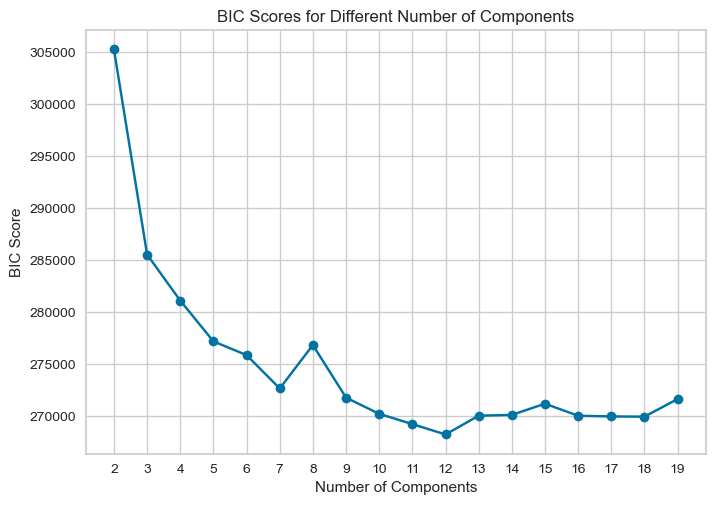

Optimal number of clusters: 12


In [ ]:
# Plot the BIC scores
plt.plot(cluster_range, bic_scores, marker='o')
plt.title('BIC Scores for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.xticks(cluster_range)
plt.show()

# Find the optimal number of components (lowest BIC score)
optimal_n_components = cluster_range[np.argmin(bic_scores)]
print("Optimal number of clusters:", optimal_n_components)

In [ ]:
n_components = 12
gmm = GaussianMixture(n_components=n_components, random_state=seed)
gmm.fit(X_PCA)
cluster_labels_gmm = gmm.predict(X_PCA)

In [ ]:
silhouette_avg = silhouette_score(X_PCA, cluster_labels_gmm)
print("Silhouette Score for", n_components, "clusters:", silhouette_avg)

Silhouette Score for 12 clusters: 0.08040932854042467


---
### 6: *Interpretations 




**Best kmeans**
| Metric | Silhouette Score |
| ---               | ----------- |
|Calinski-Harabasz| k=3 0.196|


**Agglomerate Clustering**
| Metric| Silhouette Score |
| ---               | ----------- |
| Average linkage   |  0.92 |


______________________________________

**GaussianMixture**
| Metric | Silhouette Score |
| ---               | ----------- |
|     |  0.08



Out of the three clustering models Agglomerate Clustering had the best Silhouette Score with an optimal k = 2. This k provided a decent ammount of separation among all the methods with minimal data misclassification. 

### 7. *Result Evaluations using the best Clustering algorithm Agglomerate Clustering*

In [ ]:
new_data = pd.concat([X_PCA, data_encoded,                                    
                      pd.DataFrame({'agg_clustering': agg_clustering_labels_1}), 
                      pd.DataFrame({'region': data['REGION']}),
                      ], axis=1)
new_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West,agg_clustering,region
0,-0.208853,3.306504,-10.206121,-1.919646,-4.175861,-2.113208,3.437139,-1.935634,-0.110883,-0.618029,...,0.02,50.00,38.89,11.11,0,0,1,0,0,South
1,5.653432,2.139201,-8.785330,-1.325746,-6.016011,-1.405555,1.939834,4.291682,-3.678047,2.758391,...,0.01,63.49,36.51,0.00,0,0,1,0,0,South
2,-5.105893,19.147785,-1.030881,1.850253,-0.216145,1.198650,4.755366,-0.521229,1.719262,-7.284796,...,0.04,73.33,20.00,6.67,0,0,1,0,0,South
3,-4.838071,8.729102,-1.362874,-1.022690,-4.590716,0.321147,3.237440,-2.004603,2.533578,-1.508261,...,0.04,27.27,45.45,27.27,0,0,1,0,0,South
4,-3.485745,4.258741,-3.081566,-2.441824,-5.850205,-4.284347,1.324031,-0.334505,-1.389668,1.351434,...,0.02,60.00,40.00,0.00,0,0,1,0,0,South


**Scatter Plots**

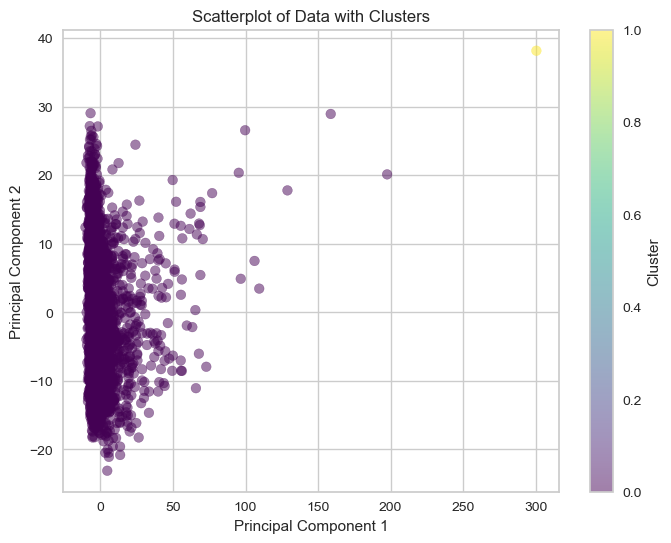

In [ ]:
PC1 = new_data['PC1']
PC2 = new_data['PC2']

# Plotting the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c=new_data['agg_clustering'], cmap='viridis', alpha=0.5)
plt.title('Scatterplot of Agglomerative clustering ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

As we can see in the cluster there is a large ammount of data that have similar contribution factors. This can also mean that eventho the silhouette score is high, the algorithms did not do a well job separating the data due to a high density.

**Box Plots**

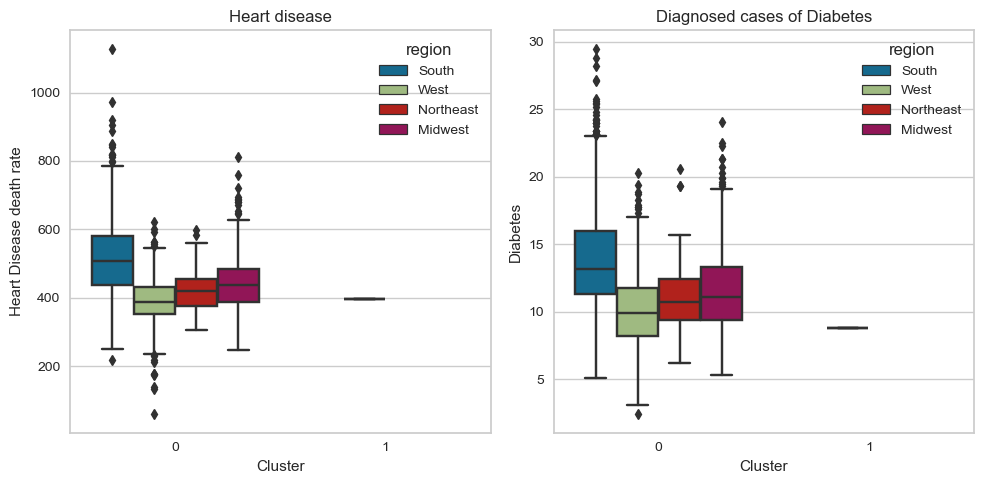

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x='agg_clustering', y='CDCA_HEART_DTH_RATE_ABOVE35', hue='region', data=new_data, ax=axes[0])
axes[0].set_title('Heart disease')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Heart Disease death rate')

sns.boxplot(x='agg_clustering', y='CHR_PCT_DIABETES', data=new_data, hue ='region', ax=axes[1])
axes[1].set_title('Diagnosed cases of Diabetes')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Diabetes')

plt.tight_layout()
plt.show()

This visualization allows us to identify the patterns in which different regions might be at risk of Heart Disease Death Or Diabete. As we can see in the plot the regions that have hihger heart disease death aldo have higher diabetes cases. This can be seen in the South region that has the highest median of all the other regions. The same trend can be seen for the other boxplots, since the medians for both Heart disease deaths and diabetes cases both match in median levels. In addition, the outliers represent that the regions could have other unique facotors that affect the data. This makes sense since the clustering algorithm had to work with very dense dataset, and had trouble separating the data into different clusters. 

REFERENCES
* Class Resources, labs, lectures, in class assigments. 
* https://www.geeksforgeeks.org/os-module-python-examples/
* https://www.statology.org/pandas-plot-value-counts/
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
* https://mode.com/python-tutorial/counting-and-plotting-in-python
* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

